![](https://i.imgur.com/mRnaHS1.jpg)
# Dota2 Games Results Data Set 
* Dota 2 is a popular computer game with **two teams** of **5 players**. At the start of the game **each player chooses a unique hero** with different strengths and weaknesses. The dataset is reasonably sparse as only 10 of 113 possible heroes are chosen in a given game. All games were played in a space of 2 hours on the 13th of August, 2016

[dataset](https://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results#)

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

train_path = 'dataset/dota2Train.csv'

train_data = pd.read_csv(train_path)
print("train set's shape")
print(train_data.shape)

train set's shape
(92649, 117)


# Attribute Information
* **column1：** Team won the game (1 or -1)
    * dota類型的遊戲通常分成兩隊
    * 在這裡的1和-1分別代表左下和右上的隊伍
* **column2：** Cluster ID 
    * 這個是指玩家現實的區域
    * 111~114：US west，121~124：US east......等，詳細可見下方連結
    * [Cluster ID](https://github.com/kronusme/dota2-api/blob/master/data/regions.json)
* **column3：** Game mode
    * 玩家選擇英雄的模式，例如：all pick就是所有英雄任意選、Captains Mode則是可以進用某些英雄，在dota2有22種mode
    * [game mode](https://github.com/kronusme/dota2-api/blob/master/data/mods.json)
* **column4：** Game type
    * 遊戲種類，例如Ranked是會算分數（天梯）的模式、Solo Mid 1vs1是單挑模式
    * [game type](https://github.com/kronusme/dota2-api/blob/master/data/lobbies.json)
* **column5~end：** Each element is an indicator for a hero.
    * 剩餘欄位每一個欄位代表一個英雄，1代表有玩家選擇了此英雄且在隊伍1，-1亦然
    * [hero](https://github.com/kronusme/dota2-api/blob/master/data/heroes.json)
    

In [2]:
train_data.head()

,-1,223,2,2.1,0,0.1,0.2,0.3,0.4,0.5,...,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102
0,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
3,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,1,122,2,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1


# Preprocessing
## rename the feature
* 將每個feature name清楚標示
* 將hero編號，100~212

In [3]:
train_data = train_data.rename({'-1':'win_team', '223':'Cluster ID', '2':'Game mode', '2.1':'Game type'}, axis = 'columns')

i = 100
for t in train_data.columns[4:117]:
    train_data = train_data.rename({t:str(i)}, axis = 'columns')
    i = i + 1
    
train_data.head(10)

,win_team,Cluster ID,Game mode,Game type,100,101,102,103,104,105,...,203,204,205,206,207,208,209,210,211,212
0,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
3,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,1,122,2,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1
5,1,224,8,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-1,227,8,3,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-1,111,2,3,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,-1,151,2,2,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,1,145,2,3,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0


## reset Cluster ID
* 把同樣地區的代號歸類


In [4]:
for i in range(0, 92649):
    t = train_data['Cluster ID'][i]
    if t == 111 or t == 112 or t == 113 or t == 114:
        # US west
        train_data['Cluster ID'][i] = 0
    elif t == 121 or t == 122 or t == 123 or t == 124:
        # US east
        train_data['Cluster ID'][i] = 1
    elif t == 131 or t == 132 or t == 133 or t == 134 or t == 135 or t == 136 or t == 137 or t == 138:
        # Europe West
        train_data['Cluster ID'][i] = 2
    elif t == 142 or t == 143 or t == 144 or t == 145:
        # South Korea
        train_data['Cluster ID'][i] = 3
    elif t == 151 or t == 152 or t == 153 or t == 154 or t == 155 or t == 156:
        # Southest Asia
        train_data['Cluster ID'][i] = 4
    elif t == 161 or t == 163 or t == 221 or t == 222 or t == 223 or t == 224 or t == 225 or t == 227 or t == 231 or t == 232:
        # China
        train_data['Cluster ID'][i] = 5
    elif t == 171:
        # Australia
        train_data['Cluster ID'][i] = 6
    elif t == 181 or t == 182 or t == 183 or t == 184 or t == 185 or t == 186 or t == 187 or t == 188:
        # Russia
        train_data['Cluster ID'][i] = 7
    elif t == 191 or t == 192:
        # Europe East
        train_data['Cluster ID'][i] = 8
    elif t == 200 or t == 202 or t == 203 or t == 204:
        # South America
        train_data['Cluster ID'][i] = 9
    elif t == 211 or t == 212 or t == 213:
        # South Africa
        train_data['Cluster ID'][i] = 10
    elif t == 241 or t == 242:
        # Chile
        train_data['Cluster ID'][i] = 11
    elif t == 251:
        # Peru
        train_data['Cluster ID'][i] = 12
    elif t == 261:
        # India
        train_data['Cluster ID'][i] = 13
        
print(train_data['Cluster ID'].value_counts())

4     40843
5     25596
7      8982
2      5442
1      2703
3      2444
8      1751
0      1642
9      1463
6      1122
13      262
12      154
11      127
10      118
Name: Cluster ID, dtype: int64


# Feature Analysis
## 玩家人數分佈
* southest asia玩家為最大宗，china次之

In [5]:
import matplotlib.pyplot as plt
plt.pie(train_data['Cluster ID'].value_counts(), autopct='%1.2f%%', radius = 2)
label = ['Southest Asia', 'china', 'Russia', 'Europe West', 'US east', 'South Korea', 'Europe East', 'US west', 'South America', 'Australia', 'India', 'Peru', 'Chile', 'South Africa']
plt.legend(label, fontsize = 10, bbox_to_anchor = (1, 0.5))
plt.show()

<Figure size 640x480 with 1 Axes>

## 兩隊勝率
* 此資料集取了9萬多場比賽的數據，照理說兩隊勝率該要趨近50%，但位於下方的隊伍明顯勝率更高一些？
    * 探討後發現，因為dota遊戲的界面在下面，因此人物在下方的隊伍可以同時獲得更多資訊
    * 另一個說法是視角問題，玩家顯示器顯示的是地圖上的一個梯形，導致螢幕下方訊息量較多，上方較少

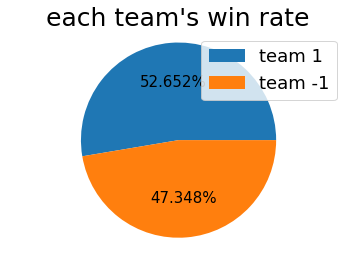

In [6]:
x = train_data['win_team'].value_counts()[1]
y = train_data['win_team'].value_counts()[-1]

label = ['team 1', 'team -1']
plt.pie([x, y], autopct='%1.3f%%', textprops = {'fontsize':15})
plt.axis('equal')
plt.legend(label, fontsize = '18')
plt.title("each team's win rate", fontsize = '25')
plt.show()

## game mode analysis
* 最熱門的遊戲模式為編號2的Captains Mode，編號8和9的Reverse Captains Mode和Greeviling也有部份場次，其餘皆很少

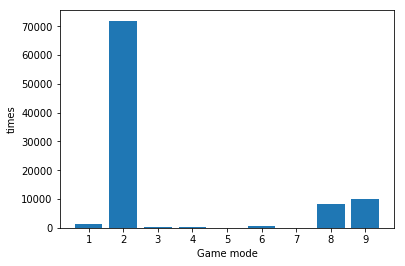

In [7]:
x = train_data['Game mode'].value_counts().index
y = train_data['Game mode'].value_counts().values

plt.bar(x, y)
plt.xticks(x)
plt.xlabel('Game mode')
plt.ylabel('times')
plt.show()

## game type analysis

In [8]:
train_data['Game type'].value_counts()

2    56987
3    35647
1       15
Name: Game type, dtype: int64

## 找出勝率最高和最低的5個英雄
* 最高勝率為編號152的英雄，有55.5%，次之為編號190，有52.9%
* 最低勝率為編號191的英雄，為48.2%

In [9]:
import collections
l1 = [i for i in range(100, 213)]
l2 = [0 for i in range(100, 213)]
win_rate = dict(zip(l1, l2))
for i in train_data.columns[4:117]:
    if train_data[i].value_counts().size != 1:
        r = train_data[i].value_counts()[1] / (train_data[i].value_counts()[1] + train_data[i].value_counts()[-1])
        win_rate[int(i)] = r

srt_win_rate = sorted(win_rate.items(), key=lambda kv: kv[1], reverse = True)

print("top-5 max win rate heroes")
for i in range(0, 5):
    print("number: %d    win rate: %.2f %%" % (srt_win_rate[i][0], srt_win_rate[i][1]*100))

print('\n')    
srt_win_rate = sorted(win_rate.items(), key=lambda kv: kv[1])

print("top-5 least win rate heroes")
for i in range(2, 7):
    print("number: %d    win rate: %.2f %%" % (srt_win_rate[i][0], srt_win_rate[i][1]*100))

top-5 max win rate heroes
number: 152    win rate: 55.67 %
number: 190    win rate: 52.76 %
number: 212    win rate: 52.32 %
number: 165    win rate: 51.90 %
number: 188    win rate: 51.40 %


top-5 least win rate heroes
number: 191    win rate: 48.20 %
number: 142    win rate: 48.60 %
number: 150    win rate: 48.81 %
number: 198    win rate: 48.85 %
number: 204    win rate: 48.88 %


## Drop useless feature(preprocessing)

In [10]:
srt_win_rate = sorted(win_rate.items(), key=lambda kv: kv[1])
srt_win_rate

[(123, 0),
 (207, 0),
 (191, 0.481981981981982),
 (142, 0.485978968452679),
 (150, 0.48813472824700177),
 (198, 0.4885205647636587),
 (204, 0.4888211382113821),
 (154, 0.48914659530181387),
 (141, 0.4891845493562232),
 (155, 0.48947368421052634),
 (104, 0.49074626865671644),
 (180, 0.49132364810330914),
 (166, 0.49164583607420076),
 (146, 0.4916923981767387),
 (167, 0.49192339716902583),
 (145, 0.4919875130072841),
 (107, 0.492390791786342),
 (111, 0.49245334796926454),
 (144, 0.4925046845721424),
 (136, 0.49305941143808996),
 (131, 0.49316182825766436),
 (183, 0.4932205228332791),
 (148, 0.49337623012869036),
 (117, 0.49348132487667373),
 (202, 0.4940426246014432),
 (157, 0.4943222143364088),
 (100, 0.49495759032925934),
 (200, 0.4951477723864138),
 (118, 0.4955001285677552),
 (174, 0.4955012853470437),
 (177, 0.49550706033376124),
 (149, 0.4956551371613563),
 (192, 0.495827027027027),
 (210, 0.4960182025028441),
 (116, 0.4964065708418891),
 (195, 0.496429344297771),
 (153, 0.49648086

## Create x_train, y_train, x_test and y_test
* 取前70000筆當作train set剩餘當作test set
* 去掉沒有被選用到的hero

In [11]:
train_data = train_data.drop(['123', '207'], axis = 1)

In [12]:
train = train_data[:70000]
test = train_data[70000:]

In [13]:
y_train = train['win_team']
x_train = train.drop('win_team', axis = 1)
y_test = test['win_team']
x_test = test.drop('win_team', axis = 1)
print(x_train.head())
print(y_train.head())

   Cluster ID  Game mode  Game type  100  101  102  103  104  105  106 ...   \
0           4          2          2    0    0    0    1    0   -1    0 ...    
1           2          2          2    0    0    0    1    0   -1    0 ...    
2           4          2          2    0    0    0    0    0    0   -1 ...    
3           6          2          3    0    0    0    0    0   -1    0 ...    
4           1          2          3    0    1    0    0    0    0    0 ...    

   202  203  204  205  206  208  209  210  211  212  
0    0    0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0    0    0  
2    0   -1    0    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0    0    0    0  
4    0    1    0    0    0    0    0    0    0   -1  

[5 rows x 114 columns]
0    1
1    1
2    1
3   -1
4    1
Name: win_team, dtype: int64


# Problem:  Predict winning and losing
* use only chosen heroes to predict

## Decision Tree
* default depth

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import pydotplus

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

predict = dtree.predict(x_test)
s = accuracy_score(y_test, predict)
print("accuracy score: %.2f %%" % (s*100))

accuracy score: 52.62 %


* depth = 4
![](https://i.imgur.com/QvngU6e.png)


In [15]:
dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(x_train, y_train)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file = dot_data,  
                filled = True, 
                feature_names = list(x_train),
                class_names = ['win', 'lose'],
                special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

predict = dtree.predict(x_test)
s = accuracy_score(y_test, predict)
print("accuracy score: %.2f %%" % (s*100))

accuracy score: 53.94 %


* depth = 5
* find that when depth increase, accuracy score also increase

In [16]:
dtree = DecisionTreeClassifier(max_depth = 6)
dtree.fit(x_train, y_train)

predict = dtree.predict(x_test)
s = accuracy_score(y_test, predict)
print("accuracy score: %.2f %%" % (s*100))

accuracy score: 54.91 %


* depth = 8

In [17]:
dtree = DecisionTreeClassifier(max_depth = 10)
dtree.fit(x_train, y_train)

predict = dtree.predict(x_test)
s = accuracy_score(y_test, predict)
print("accuracy score: %.2f %%" % (s*100))

accuracy score: 55.00 %


* depth = 10
* After I tried many depth number, I found that the maximum score is about **55.2%**
* 繼續增加深度會導致 **Overfitting**


### 把splitter改為random試試看（預設為best）
* 結果差不多，因為random的關係準確率在55%~55.5%浮動


In [18]:
dtree = DecisionTreeClassifier(max_depth = 10, splitter = 'random')
dtree.fit(x_train, y_train)

predict = dtree.predict(x_test)
s = accuracy_score(y_test, predict)
print("accuracy score: %.2f %%" % (s*100))

accuracy score: 55.35 %


## Logistic Regression
* 全用default設定，準確率有60.43%，意外的高

In [19]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)

result = LR.predict(x_test)
s = accuracy_score(y_test, result)
print("accuracy score: %.2f %%" % (s*100))

accuracy score: 60.43 %


* 改變penalty（預設為l2）

In [20]:
LR = LogisticRegression(penalty = 'l1')
LR.fit(x_train, y_train)

result = LR.predict(x_test)
s = accuracy_score(y_test, result)
print("accuracy score: %.2f %%" % (s*100))

accuracy score: 60.45 %


* 拿掉可能無關的feature
    * Cluster ID, game mode, game mode
* 出乎意料的降低了

In [21]:
LR = LogisticRegression()
LR.fit(x_train.drop(['Cluster ID', 'Game mode', 'Game type'], axis = 1), y_train)

result = LR.predict(x_test.drop(['Cluster ID', 'Game mode', 'Game type'], axis = 1))
s = accuracy_score(y_test, result)
print("accuracy score: %.2f %%" % (s*100))

accuracy score: 60.39 %


* 再試試看改變penalty

In [22]:
LR = LogisticRegression(penalty = 'l1')
LR.fit(x_train.drop(['Cluster ID', 'Game mode', 'Game type'], axis = 1), y_train)

result = LR.predict(x_test.drop(['Cluster ID', 'Game mode', 'Game type'], axis = 1))
s = accuracy_score(y_test, result)
print("accuracy score: %.2f %%" % (s*100))

accuracy score: 60.37 %


## NN

* 將result改為1和0

In [23]:
MMap = {1:1, -1:0}
y_train = y_train.map(MMap)
y_test = y_test.map(MMap)

* 準確率為59.4%

In [24]:
from keras import models, layers, optimizers, regularizers

hidden_units = 10
activation = 'relu'
l2 = 0.001
learning_rate = 0.01
epochs = 10
batch_size = 32

Using TensorFlow backend.


In [25]:
model = models.Sequential()

#hidden layer
model.add(layers.Dense(input_dim = 114, units = 128, activation='relu'))

#output layer
model.add(layers.Dense(input_dim = 128, units = 1, activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [26]:
# train
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

# evaluate accuracy
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Testing accuracy: %s' % test_acc)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
70000/70000 [==============================] - 6s 88us/step - loss: 0.6737 - acc: 0.5832
Epoch 2/10
70000/70000 [==============================] - 6s 89us/step - loss: 0.6687 - acc: 0.5943
Epoch 3/10
70000/70000 [==============================] - 6s 91us/step - loss: 0.6665 - acc: 0.5948
Epoch 4/10
70000/70000 [==============================] - 6s 90us/step - loss: 0.6639 - acc: 0.5984
Epoch 5/10
70000/70000 [==============================] - 7s 95us/step - loss: 0.6591 - acc: 0.6029
Epoch 6/10
70000/70000 [==============================] - 6s 91us/step - loss: 0.6530 - acc: 0.6106
Epoch 7/10
70000/70000 [==============================] - 6s 92us/step - loss: 0.6456 - acc: 0.6168
Epoch 8/10
70000/70000 [==============================] - 6s 86us/step - loss: 0.6378 - acc: 0.6210
Epoch 9/10
70000/70000 [==============================] - 6s 89us/step - loss: 0.6304 - acc: 0.6266
Epoch 10/10
22649/22649 [===========================

### 試試看拿掉一些feature
    * Cluster ID, game mode, game mode
    * 遺憾的是沒有增加

In [27]:
model = models.Sequential()

#hidden layer
model.add(layers.Dense(input_dim = 111, units = 128, activation='relu'))

#output layer
model.add(layers.Dense(input_dim = 128, units = 1, activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [28]:
# train
history = model.fit(x_train.drop(['Cluster ID', 'Game mode', 'Game type'], axis = 1), y_train, epochs=epochs, batch_size=batch_size)

# evaluate accuracy
test_acc = model.evaluate(x_test.drop(['Cluster ID', 'Game mode', 'Game type'], axis = 1), y_test, batch_size=32)[1]
print('Testing accuracy: %s' % test_acc)


Epoch 1/10
70000/70000 [==============================] - 7s 94us/step - loss: 0.6772 - acc: 0.5765
Epoch 2/10
70000/70000 [==============================] - 6s 92us/step - loss: 0.6726 - acc: 0.5846
Epoch 3/10
70000/70000 [==============================] - 7s 95us/step - loss: 0.6682 - acc: 0.5953
Epoch 4/10
70000/70000 [==============================] - 7s 98us/step - loss: 0.6638 - acc: 0.6009
Epoch 5/10
70000/70000 [==============================] - 7s 98us/step - loss: 0.6576 - acc: 0.6093
Epoch 6/10
70000/70000 [==============================] - 7s 97us/step - loss: 0.6485 - acc: 0.6209
Epoch 7/10
70000/70000 [==============================] - 7s 95us/step - loss: 0.6382 - acc: 0.6322
Epoch 8/10
70000/70000 [==============================] - 7s 96us/step - loss: 0.6265 - acc: 0.6457
Epoch 9/10
70000/70000 [==============================] - 7s 97us/step - loss: 0.6150 - acc: 0.6565
Epoch 10/10
22649/22649 [==============================] - 1s 54us/step
Testing accuracy: 0.56744227

### 多一層layer
* 還是沒有變好＠＠

In [29]:
model = models.Sequential()

#hidden layer
model.add(layers.Dense(input_dim = 111, units = 64, activation='relu'))

model.add(layers.Dense(input_dim = 64, units = 64, activation='relu'))

#output layer
model.add(layers.Dense(input_dim = 64, units = 1, activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [30]:
# train
history = model.fit(x_train.drop(['Cluster ID', 'Game mode', 'Game type'], axis = 1), y_train, epochs=epochs, batch_size=batch_size)

# evaluate accuracy
test_acc = model.evaluate(x_test.drop(['Cluster ID', 'Game mode', 'Game type'], axis = 1), y_test, batch_size=32)[1]
print('Testing accuracy: %s' % test_acc)


Epoch 1/10
70000/70000 [==============================] - 8s 118us/step - loss: 0.6730 - acc: 0.5830
Epoch 2/10
70000/70000 [==============================] - 7s 107us/step - loss: 0.6677 - acc: 0.5939
Epoch 3/10
70000/70000 [==============================] - 8s 117us/step - loss: 0.6655 - acc: 0.5968
Epoch 4/10
70000/70000 [==============================] - 8s 118us/step - loss: 0.6618 - acc: 0.6026
Epoch 5/10
70000/70000 [==============================] - 7s 104us/step - loss: 0.6579 - acc: 0.6085
Epoch 6/10
70000/70000 [==============================] - 9s 124us/step - loss: 0.6530 - acc: 0.6120
Epoch 7/10
70000/70000 [==============================] - 8s 113us/step - loss: 0.6465 - acc: 0.6169
Epoch 8/10
70000/70000 [==============================] - 8s 119us/step - loss: 0.6414 - acc: 0.6206
Epoch 9/10
70000/70000 [==============================] - 8s 121us/step - loss: 0.6372 - acc: 0.6238
Epoch 10/10
22649/22649 [==============================] - 1s 63us/step
Testing accuracy: 0

# Summary
 嘗試三種model來improve我的預測結果
## Decesion Tree
* 準確率最高也來到55.5%左右，觀察後發現tree的gini值都偏高，沒辦法找到一個很好的分法
* 調高深度也無法增加準確率，且會導致overfitting
## Logistic Regression
* 最好的值來到60.5%，是目前最好的值
## NN
* 準確率也來到約60%
## 結論
* 三種模型都沒辦法很高準確的預測dota遊戲勝負，我猜測是因為就算是勝率最低的hero也有48%左右的勝率，所以沒辦法做到很好的classify
* 此類遊戲勝負會趨近一半一半，且勝率最高的hero也只有55%，因此60%左右的預測準確度是可以預期的

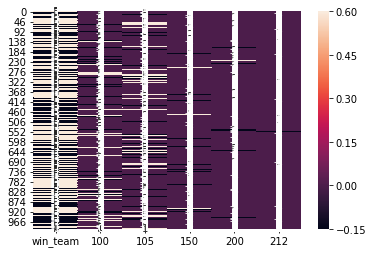

In [31]:
import seaborn as sns
sns.heatmap(train_data[['win_team', '100', '105', '150', '200', '212']][0:1000], annot = True, vmax = 0.6, vmin = -0.15)